# University Admission Prediction with Logistics Regression

In this project, we will build a binary classification model using Logistics Regression to predict whether a student will be admitted to a university based on their academic profile.

Also, we will be covering 2 different methods to compare the log_loss and accuracy values: SVM and Random Forest Classifier.

### The Columns
1. **GRE Score**: Standardized test score for graduate school admission, assessing verbal, quantitative, and analytical skills.

2. **TOEFL Score**: Test of English proficiency for non-native speakers.

3. **University Rating**: A numerical rating of the university's reputation.

4. **SOP (Statement of Purpose)**: Personal essay explaining why the applicant wants to study at the university.

5. **LOR (Letter of Recommendation)**: A letter from a recommender supporting the applicant's qualifications.

6. **CGPA (Cumulative Grade Point Average)**: The applicant's overall academic performance during undergraduate studies.

7. **Research**: Whether the applicant has previous research experience (1 for yes, 0 for no).
8. **Chance of Admit**: Possibility of getting admitted.

### Main Deliverables

- Cleaned dataset and preprocessing steps  
- Trained logistic regression model  
- Evaluation metrics (accuracy, precision, recall, F1-score)  
- Learning process summary (weights, bias, stopping)  
- Interpretation and improvement ideas




## Understanding the Dataset
Starting with connecting to Google Drive and importing the dataset as a pandas DataFrame.

In [189]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [190]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Admission_Predict.csv")

In [191]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Visualization

### TOEFL Score

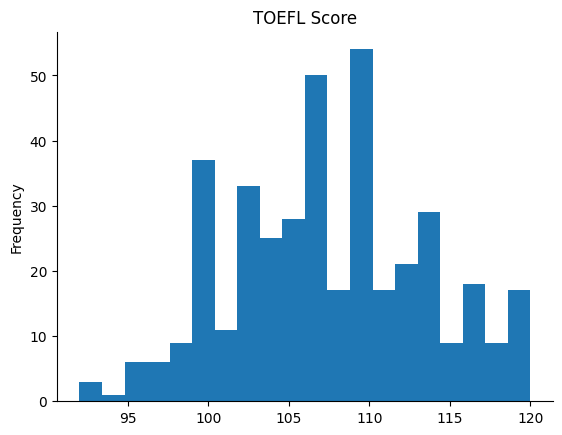

In [192]:
import matplotlib.pyplot as plt
df['TOEFL Score'].plot(kind='hist', bins=20, title='TOEFL Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

See the distribution of TOEFL grades here. It's mostly aggregated around 105-110, which means these students generally tend to have a good level of english level and an academic profile.

### GRE Score vs TOEFL Score

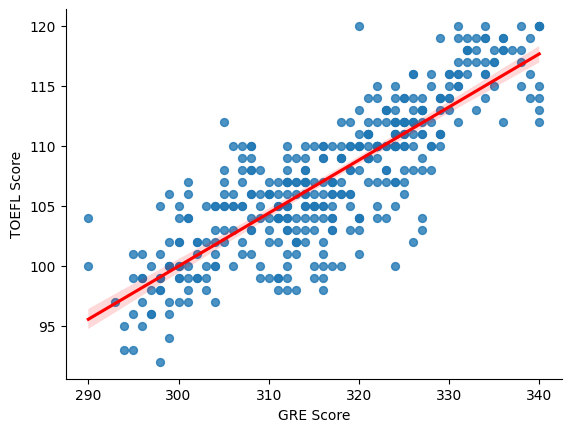

In [193]:
import seaborn as sns
df.plot(kind='scatter', x='GRE Score', y='TOEFL Score', s=32, alpha=.8)
sns.regplot(x=df["GRE Score"], y=df["TOEFL Score"], scatter=False, color='red', line_kws={"color": "red"})
plt.gca().spines[['top', 'right',]].set_visible(False)

See here as the GRE (Graduate Record Examinations) score increases, TOEFL score also increases which means there is a positive correlation between these two variables, expectedly.

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


As we can clearly see from here, we don't have to operate a missing value analysis, since there aren't any missing values. Also, the variables are in their correct form of data types.

In [195]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,400.0,200.500000,115.614301,1.00,100.75,200.50,300.2500,400.00
GRE Score,400.0,316.807500,11.473646,290.00,308.00,317.00,325.0000,340.00
TOEFL Score,400.0,107.410000,6.069514,92.00,103.00,107.00,112.0000,120.00
University Rating,400.0,3.087500,1.143728,1.00,2.00,3.00,4.0000,5.00
SOP,400.0,3.400000,1.006869,1.00,2.50,3.50,4.0000,5.00
LOR,400.0,3.452500,0.898478,1.00,3.00,3.50,4.0000,5.00
CGPA,400.0,8.598925,0.596317,6.80,8.17,8.61,9.0625,9.92
Research,400.0,0.547500,0.498362,0.00,0.00,1.00,1.0000,1.00
Chance of Admit,400.0,0.724350,0.142609,0.34,0.64,0.73,0.8300,0.97


Since we don't have a very big and complex dataset, the numerical values also represent

## Preprocessing the Dataset

### Steps:
1. Missing value analysis
2. Feature Engineering

In [196]:
df["Chance of Admit Binary"] = (df["Chance of Admit "] >= 0.75).astype(int)

In the cell above, we set Chance of Admit column values
* 1: if the possibility is greater or equal than 0.75
* 0: if the possibility is less than 0.75
which will return boolean values. Then, by .astype(int), we convert the column from boolean into integer value. This will ease the classification process.

In [197]:
df = df.drop(columns=["Serial No.", "Chance of Admit "], axis=1)

We dropped these columns because:
* We didn't need Serial No. (it was unnecessary)
* We already converted Chance of Admit into another column and didn't want to confuse the model with irrelevant data.

In [198]:
df.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit Binary
395,324,110,3,3.5,3.5,9.04,1,1
396,325,107,3,3.0,3.5,9.11,1,1
397,330,116,4,5.0,4.5,9.45,1,1
398,312,103,3,3.5,4.0,8.78,0,0
399,333,117,4,5.0,4.0,9.66,1,1


This is a table of success.

## Splitting the Data
In this section, we will split the data into %80 train and %20 test sets.
### Steps:
1. Train Test Split (80-20)
2. Feature Scaling

In [199]:
from sklearn.model_selection import train_test_split

X = df.drop(columns="Chance of Admit Binary")
y = df["Chance of Admit Binary"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

We splitted our dataset into %80 train and %20 test sets. Now, we will scale these datasets. Doing the scaling process **after** the train test split is important.

In [200]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Here we scale our splitted datasets to set the mean of the features to 0. Also, we scale our datasets after splitting into train and test sets because we want to **prevent data leakage**:
If we scale before splitting, the scaler uses information from the entire dataset (including test data) to compute statistics like mean and standard deviation. This would leak information from the test set into the training process — which leads to overly optimistic performance results and a less realistic model.

So, we split the data first, and then fit the scaler only on the training set.
After that, we transform both the training and test sets using that same scaler.

## Training the Logistic Regression Model
In this section, we will create our logistic regression model and fit it into our dataset.
### Steps:
1. Initialize the Logistic Regression Model
2. Fit the model
3. Make predictions


In [201]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

We created our logistic regression model to train with our scaled data.

## Model Evaluation

### Metrics:

1. Calculate Accuracy
2. Confusion Matrix
3. Classification Report
4. Probability vs. Actual Comparison


In [202]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.9125

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92        47
           1       0.86      0.94      0.90        33

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80


Confusion Matrix:
[[42  5]
 [ 2 31]]


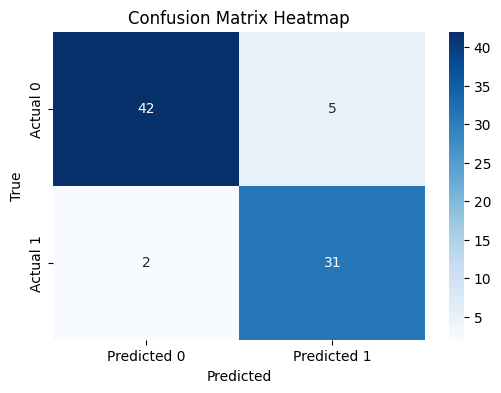

In [203]:
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted 0", "Predicted 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix Heatmap")
plt.show()

According to the confusion matrix:
- True Negatives (TN): 42 → Model correctly predicted class 0.

- False Positives (FP): 5 → Model incorrectly predicted class 1 for actual class 0.

- False Negatives (FN): 2 → Model missed class 1 instances and predicted them as 0.

- True Positives (TP): 31 → Model correctly predicted class 1.

Also, the logistic regression model performs very well overall. It demonstrates:

* **High accuracy**, indicating that the model classifies most examples correctly.

* **Strong recall**, meaning it successfully identifies the majority of positive class (1) instances.

* **Good precision**, so the positive predictions are mostly correct.

* **Low false negatives and false positives**, showing a balanced performance.

## Analyzing the Learning Process

### Steps:
1. Track Weights (W) and Bias (b)
2. Early Stopping
    - Show how the model stops training based on the `tol` parameter (tolerance).


In [204]:
from sklearn.linear_model import SGDClassifier
import numpy as np

# Stochastic Gradient Descent with SGDClassifier
sgd_model = SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-4, random_state=42, verbose=1)

sgd_model.fit(X_train, y_train.values.ravel())

print(f"\nLast Bias (b): {sgd_model.intercept_}")
print(f"Last Weights (W): {sgd_model.coef_[:3]}")  # First 3 weights

-- Epoch 1
Norm: 37.88, NNZs: 7, Bias: -9.922999, T: 320, Avg. loss: 3.826109
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 24.18, NNZs: 7, Bias: 3.722604, T: 640, Avg. loss: 2.875460
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 25.39, NNZs: 7, Bias: -5.767029, T: 960, Avg. loss: 2.197752
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 24.45, NNZs: 7, Bias: -1.303528, T: 1280, Avg. loss: 1.842952
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 18.74, NNZs: 7, Bias: -1.301470, T: 1600, Avg. loss: 1.828403
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 13.22, NNZs: 7, Bias: -2.510519, T: 1920, Avg. loss: 1.534981
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 10.24, NNZs: 7, Bias: 0.676767, T: 2240, Avg. loss: 1.495193
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 10.01, NNZs: 7, Bias: -8.804867, T: 2560, Avg. loss: 1.032687
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.09, NNZs: 7, Bias: -0.629634, T: 2880, Avg. loss: 1.126072
Total training 

In the code above, the tol (tolerance) parameter enables early stopping. If the improvement in loss becomes smaller than 1e-4 (0.0001), the training stops early, avoiding unnecessary iterations.
Setting tol=None disables early stopping and forces the model to train for all max_iter iterations.
We can also set verbose=1 to see at which iteration the training stops.

Let's try with a smaller tolerance level:

In [205]:
sgd_model_2 = SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-5, random_state=42, verbose=1)

sgd_model_2.fit(X_train, y_train.values.ravel())

print(f"\nLast Bias (b): {sgd_model_2.intercept_}")
print(f"Last Weights (W): {sgd_model_2.coef_[:3]}")  # First 3 weights

-- Epoch 1
Norm: 37.88, NNZs: 7, Bias: -9.922999, T: 320, Avg. loss: 3.826109
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 24.18, NNZs: 7, Bias: 3.722604, T: 640, Avg. loss: 2.875460
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 25.39, NNZs: 7, Bias: -5.767029, T: 960, Avg. loss: 2.197752
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 24.45, NNZs: 7, Bias: -1.303528, T: 1280, Avg. loss: 1.842952
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 18.74, NNZs: 7, Bias: -1.301470, T: 1600, Avg. loss: 1.828403
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 13.22, NNZs: 7, Bias: -2.510519, T: 1920, Avg. loss: 1.534981
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 10.24, NNZs: 7, Bias: 0.676767, T: 2240, Avg. loss: 1.495193
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 10.01, NNZs: 7, Bias: -8.804867, T: 2560, Avg. loss: 1.032687
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.09, NNZs: 7, Bias: -0.629634, T: 2880, Avg. loss: 1.126072
Total training 

Nothing changed!

In [206]:
sgd_model_3 = SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-6, random_state=42, verbose=1)

sgd_model_3.fit(X_train, y_train.values.ravel())

print(f"\nLast Bias (b): {sgd_model_3.intercept_}")
print(f"Last Weights (W): {sgd_model_3.coef_[:3]}")  # First 3 weights

-- Epoch 1
Norm: 37.88, NNZs: 7, Bias: -9.922999, T: 320, Avg. loss: 3.826109
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 24.18, NNZs: 7, Bias: 3.722604, T: 640, Avg. loss: 2.875460
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 25.39, NNZs: 7, Bias: -5.767029, T: 960, Avg. loss: 2.197752
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 24.45, NNZs: 7, Bias: -1.303528, T: 1280, Avg. loss: 1.842952
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 18.74, NNZs: 7, Bias: -1.301470, T: 1600, Avg. loss: 1.828403
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 13.22, NNZs: 7, Bias: -2.510519, T: 1920, Avg. loss: 1.534981
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 10.24, NNZs: 7, Bias: 0.676767, T: 2240, Avg. loss: 1.495193
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 10.01, NNZs: 7, Bias: -8.804867, T: 2560, Avg. loss: 1.032687
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.09, NNZs: 7, Bias: -0.629634, T: 2880, Avg. loss: 1.126072
Total training 

Although we tried different tol values like 1e-4, 1e-5, and 1e-6, the results remained the same because the model consistently stopped training at the 54th epoch. This indicates that the improvement in loss between epochs becomes smaller than the specified tolerance early on. So, regardless of how strict the tolerance is, the model sees no significant gain and stops. It shows that the model **converges** quickly and stably.

Now, let's try with the tolerance parameter **off**!

In [207]:
sgd_model_no_tol = SGDClassifier(loss="log_loss", max_iter=100, tol=None, random_state=42, verbose=1)

sgd_model_no_tol.fit(X_train, y_train.values.ravel())

print(f"\nLast Bias (b): {sgd_model_no_tol.intercept_}")
print(f"Last Weights (W): {sgd_model_no_tol.coef_[:3]}")

-- Epoch 1
Norm: 37.88, NNZs: 7, Bias: -9.922999, T: 320, Avg. loss: 3.826109
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 24.18, NNZs: 7, Bias: 3.722604, T: 640, Avg. loss: 2.875460
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 25.39, NNZs: 7, Bias: -5.767029, T: 960, Avg. loss: 2.197752
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 24.45, NNZs: 7, Bias: -1.303528, T: 1280, Avg. loss: 1.842952
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 18.74, NNZs: 7, Bias: -1.301470, T: 1600, Avg. loss: 1.828403
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 13.22, NNZs: 7, Bias: -2.510519, T: 1920, Avg. loss: 1.534981
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 10.24, NNZs: 7, Bias: 0.676767, T: 2240, Avg. loss: 1.495193
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 10.01, NNZs: 7, Bias: -8.804867, T: 2560, Avg. loss: 1.032687
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 9.09, NNZs: 7, Bias: -0.629634, T: 2880, Avg. loss: 1.126072
Total training 

There's not much difference, but at least there IS! Is this change worth this much computation (especially in bigger and more complex datasets)? The answer is: it will depend on the model and the requirements. Here, we can use tolerance off, setting the maximum iterations to 100 to get average loss 0.321684, which is

In [208]:
0.380813 - 0.321684

0.05912899999999999

less than the latest average loss.

## Interpretation and Model Improvement

### Steps:
1. Most Influential Features
  - Analyze feature coefficients to identify which features most influence the prediction.
2. Try Alternative Thresholds
  - Test different classification thresholds (e.g., 0.7, 0.8) and evaluate impact.
3. Suggestions for Model Improvement
  - Ideas for improving performance:
    - Add more features  
    - Try other models (e.g., Random Forest, SVM)  
    - Perform cross-validation  
    - Tune hyperparameters  

In [209]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

results_df = pd.DataFrame({
    "Real Value (Y)": y_test.values.flatten(),
    "Predicted Value": y_pred_proba.round(4),
    "Prediction (0 = Not Admitted, 1 = Admitted)": y_pred
})

display(results_df.head(25))

,Real Value (Y),Predicted Value,"Prediction (0 = Not Admitted, 1 = Admitted)"
0,0,0.0820,0
1,0,0.5204,1
2,1,0.9971,1
3,1,0.9452,1
4,0,0.0134,0
5,1,0.9969,1
6,0,0.0024,0
7,0,0.0029,0
8,0,0.0566,0
9,1,0.9538,1


Our model seems to work well from this table, it got its predictions well.

In [210]:
from sklearn.model_selection import cross_val_score, cross_val_predict

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5)
print("Classification Report:\n", classification_report(y_train, y_pred_cv))

y_proba_cv = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')
log_loss_cv = log_loss(y_train, y_proba_cv)
print("Cross-validated Log Loss:", log_loss_cv)
print("Bias: ", model.intercept_)

Cross-validated Accuracy Scores: [0.78125  0.875    0.84375  0.953125 0.875   ]
Mean Accuracy: 0.865625
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88       173
           1       0.86      0.84      0.85       147

    accuracy                           0.87       320
   macro avg       0.87      0.86      0.86       320
weighted avg       0.87      0.87      0.87       320

Cross-validated Log Loss: 0.3025812636774021
Bias:  [-0.37879045]


The logistic regression model achieved a mean cross-validated accuracy of 86.6%, indicating good overall performance. The classification report shows balanced precision and recall for both classes, with a slightly better performance on class 0. The cross-validated log loss is low at 0.30, suggesting that the model's predicted probabilities are well-calibrated. The learned bias term is -0.38, reflecting the model’s decision boundary offset. Cross validation provides a better loss than without using it.

## Using SVM
### Using rbf kernel

In [211]:
from sklearn.svm import SVC

SVM_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)

SVM_model.fit(X_train, y_train)

y_pred_svm = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9125
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        47
           1       0.86      0.94      0.90        33

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



In [212]:
from sklearn.metrics import log_loss

y_proba = SVM_model.predict_proba(X_test)

log_loss_value = log_loss(y_test, y_proba)
print(f"log_loss: {log_loss_value}")
print(f"Bias: {SVM_model.intercept_}")

log_loss: 0.2144324969075641
Bias: [-0.134932]


There are not much different than logistic regression here for the evaluation metrics however, the log loss has a massive reduce.

In [213]:
print("Log Reg log_loss without cross val: ", 0.380813 - 0.20925936423413005)
print("Log Reg log_loss with cross val:    ", 0.321684 - 0.20925936423413005)

Log Reg log_loss without cross val:  0.17155363576586996
Log Reg log_loss with cross val:     0.11242463576586997


## Using linear kernel

In [214]:
SVM_model_linear = SVC(kernel='linear', C=1.0, probability=True)

SVM_model_linear.fit(X_train, y_train)

y_pred_linear = SVM_model_linear.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

y_proba_linear = SVM_model_linear.predict_proba(X_test)

log_loss_value_linear = log_loss(y_test, y_proba_linear)
print("Log Loss:", log_loss_value_linear)
print("Weights (coef_):", SVM_model_linear.coef_)
print("Bias (intercept_):", SVM_model_linear.intercept_)

Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.87      0.91        47
           1       0.84      0.94      0.89        33

    accuracy                           0.90        80
   macro avg       0.90      0.91      0.90        80
weighted avg       0.91      0.90      0.90        80

Log Loss: 0.19635968082217098
Weights (coef_): [[0.48903201 0.14627594 0.30374111 0.12621775 0.26712054 1.20849755
  0.37926265]]
Bias (intercept_): [-0.26761877]


Not much difference from the SVM model with rfb kernel.

### Difference between the rbf and linear kernels:
* Linear Kernel: Uses the data as-is. It can only create straight-line (linear) decision boundaries. It's fast and simple — best when your data is linearly separable.

* RBF (Radial Basis Function) Kernel: Transforms data into a higher-dimensional space to find nonlinear boundaries. It's more flexible, good for complex data, but also more computationally expensive and can overfit if not tuned well.

## Using Random Forest

In [215]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

log_loss_val_rf = log_loss(y_test, y_proba_rf)
print("Log Loss:", log_loss_val_rf)

Accuracy: 0.9125
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        47
           1       0.86      0.94      0.90        33

    accuracy                           0.91        80
   macro avg       0.91      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80

Log Loss: 0.21944518807781566


Random forest classifier with 100 estimators has almost the same metric values and log_loss with the SVM model. The distinct difference will be apparent in more complex and bigger datasets.
### Bias of Random Forest Classifier Model:
The bias value cannot be found directly by using .intercept_ attribute as used in the previous ones, here we will take one forest as reference.

In [216]:
from sklearn.tree import export_text

feature_names = df.drop(columns="Chance of Admit Binary")

rf_model.estimators_[0]  # First decision tree
print(export_text(rf_model.estimators_[0], feature_names=feature_names.columns))

|--- LOR  <= 0.33
|   |--- University Rating <= 0.38
|   |   |--- CGPA <= 0.13
|   |   |   |--- Research <= -0.08
|   |   |   |   |--- GRE Score <= 0.32
|   |   |   |   |   |--- class: 0.0
|   |   |   |   |--- GRE Score >  0.32
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- Research >  -0.08
|   |   |   |   |--- GRE Score <= -0.47
|   |   |   |   |   |--- SOP <= -0.12
|   |   |   |   |   |   |--- CGPA <= -0.39
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- CGPA >  -0.39
|   |   |   |   |   |   |   |--- TOEFL Score <= -0.66
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- TOEFL Score >  -0.66
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- SOP >  -0.12
|   |   |   |   |   |   |--- CGPA <= -0.82
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- CGPA >  -0.82
|   |   |   |   |   |   |   |--- GRE Score <= -1.10
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |

In [217]:
scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("CV Accuracy Scores:", scores)
print("Estimated Bias (1 - mean accuracy):", 1 - np.mean(scores))

CV Accuracy Scores: [0.765625 0.875    0.765625 0.859375 0.890625]
Estimated Bias (1 - mean accuracy): 0.16874999999999996


As we can clearly see by comparing these three methods, we can easily say that the SVM model with linear kernel showed the best loss performance in terms of log_loss. Log losses are as follows:

| Method | Accuracy | Log Loss | Bias |
| -------- | ------- | ------- | ------- |
| Logistic Regression | 0.9125 | 0.38 | -1.13 |
| Logistic Regression with Cross Validation | 0.8675 | 0.3025 | -0.3787 |
| SVM - rfb kernel | 0.9125 | 0.209 | -0.1349 |
| SVM - linear kernel | 0.9 | 0.19 | -0.2676 |
| Random Forest Classifier | 0.9125 | 0.2194 | 0.1687 |

As a result, SVM with rfb kernel demonstrated better performance compared to other models trained and evaluated.